In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from math import pi
import category_encoders as ce

In [2]:
data = pd.read_csv('data/player_data.csv')

In [3]:
data.head()

,player_name,unique_id,age,overall_score,height,weight,preferred_foot,best_position,player_value,weekly_wage,crossing,finishing,heading_accuracy,short_passing,volley,dribbling,curves,free_kick_accuracy,long_pass,ball_control,acceleration,sprint_speed,agility,reaction,balance,shot_power,jumping,stamina,strength,long_shot,aggression,interception,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,weak_foot,skill_moves,attacking_work_rate,defensive_work_rate,pace,shooting,passing,dribble,defense,physical
0,Neymar Jr,190871,27,92,"5'9""",150lbs,Right,LW,$119.2M,$328K,87,87,62,87,87,96,88,89,81,95,94,89,96,92,84,80,61,81,49,85,51,36,87,90,92,94,35,30,29,5 ★,5★,High,Medium,91,85,87,95,36,58
1,L. Messi,158023,32,94,"5'7""",159lbs,Left,RW,$107.9M,$633K,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,4 ★,4★,Medium,Low,87,92,92,96,39,66
2,K. Mbappé,231747,20,89,"5'10""",161lbs,Right,ST,$105.7M,$170K,78,89,75,82,81,90,79,63,70,89,96,96,92,91,83,84,76,86,76,79,62,38,90,80,70,84,34,34,32,4 ★,5★,High,Low,96,85,78,90,39,76
3,V. van Dijk,203376,27,91,"6'4""",203lbs,Right,CB,$101.7M,$271K,53,52,87,79,45,70,60,70,83,77,74,79,61,89,53,81,90,75,92,64,83,90,47,65,62,90,93,93,86,3 ★,2★,Medium,Medium,77,60,70,71,91,86
4,K. De Bruyne,192985,28,91,"5'11""",154lbs,Right,CAM,$101.7M,$418K,94,82,55,92,82,87,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,63,88,94,82,91,68,62,53,5 ★,4★,High,High,76,86,92,87,62,78


In [4]:
#convert height to centimeters
cen_in_feet = 12 # 1 foot = 12 inches
cen_in_inch = 2.54 # 1 inch = 2.54 centimeters
height_cm = []
for i in list(data['height'].str.replace("'",'').str.replace('"', '')):
    feet = int(i[0])
    inches = int(i[1:])
    
    centimeters = round((((feet * 12) + inches) * 2.54), 2)
    height_cm.append(centimeters)

data['height_cm'] = height_cm

In [5]:
#weight in kg
data['weight_kg'] = round(data.weight.str.extract('(\d+)').astype(int)/2.20462, 2)

In [6]:
def get_stats(column):
    print('mean {}'.format(column), data[column].mean())
    print('Standard Deviation {}'.format(column), data[column].std())
    sns.set()
    plt.title('{} Histogram'.format(column))
    data[column].hist(bins=10)

mean height_cm 181.17916029752993
Standard Deviation height_cm 6.780179938471034


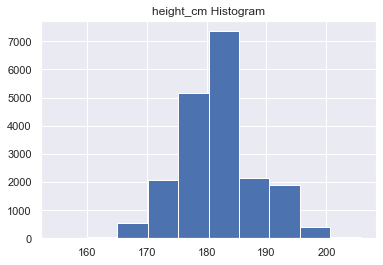

In [7]:
get_stats('height_cm')

mean weight_kg 75.09823754203985
Standard Deviation weight_kg 7.026738937344


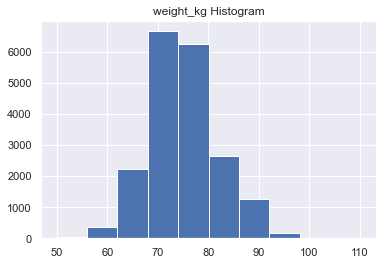

In [8]:
get_stats('weight_kg')

In [9]:
#explore player wages
wage_comp = data[['player_name','player_value','weekly_wage','best_position','age']]

In [10]:
wage_comp.head()

,player_name,player_value,weekly_wage,best_position,age
0,Neymar Jr,$119.2M,$328K,LW,27
1,L. Messi,$107.9M,$633K,RW,32
2,K. Mbappé,$105.7M,$170K,ST,20
3,V. van Dijk,$101.7M,$271K,CB,27
4,K. De Bruyne,$101.7M,$418K,CAM,28


In [11]:
#clean the currency weekly_wage values
def weekly_pay(player):
    i = player.replace('$', '')
    for p in i:
        if 'K' not in p:
            converter = i
        else:
            t_ = i.replace('K', '')
            converter = float(t_)*1e3
            
    return converter

wage_comp['weekly_salary'] = wage_comp['weekly_wage'].apply(weekly_pay)
wage_comp.weekly_salary = wage_comp.weekly_salary.astype(float)

<ipython-input-11-869d659b6a1a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wage_comp['weekly_salary'] = wage_comp['weekly_wage'].apply(weekly_pay)
/Users/drexhepi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [12]:
wage_comp.head()

,player_name,player_value,weekly_wage,best_position,age,weekly_salary
0,Neymar Jr,$119.2M,$328K,LW,27,328000.0
1,L. Messi,$107.9M,$633K,RW,32,633000.0
2,K. Mbappé,$105.7M,$170K,ST,20,170000.0
3,V. van Dijk,$101.7M,$271K,CB,27,271000.0
4,K. De Bruyne,$101.7M,$418K,CAM,28,418000.0


In [13]:
#clean the player_value
player_value = []
for i in wage_comp['player_value']:
    value = i.replace('$', '')
    if 'M' in value:
        mil = value.replace('M','')
        mil = round(float(mil)* 1e6, 2)
        player_value.append(mil)
    elif 'K' in value:
        tho = value.replace('K', '')
        tho = round(float(tho)* 1e3, 2)
        player_value.append(tho)
    else:
        zero = value
        player_value.append(zero)
        
        
wage_comp['player_market_value'] = player_value
wage_comp = wage_comp.drop(columns=['player_value','weekly_wage'])

<ipython-input-13-641f8c5ea997>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wage_comp['player_market_value'] = player_value


In [14]:
wage_comp.head()

,player_name,best_position,age,weekly_salary,player_market_value
0,Neymar Jr,LW,27,328000.0,1.192e+08
1,L. Messi,RW,32,633000.0,1.079e+08
2,K. Mbappé,ST,20,170000.0,1.057e+08
3,V. van Dijk,CB,27,271000.0,1.017e+08
4,K. De Bruyne,CAM,28,418000.0,1.017e+08


In [15]:
#whats the mean, median, min, max values for each position
#remove salary 0, a few players that dont get paid at all, these are possibly players from lower divisions 
wage_comp[wage_comp['weekly_salary']!=0].groupby('best_position')['weekly_salary'].agg(['mean','median','min','max'])

,mean,median,min,max
best_position,,,,
CAM,10875.814880,3000.0,565.0,418000.0
CB,9634.019419,3000.0,565.0,339000.0
CDM,10418.842177,3000.0,565.0,316000.0
CF,40340.509615,8000.0,565.0,418000.0
CM,15055.560748,4000.0,565.0,384000.0
GK,7026.759131,2000.0,565.0,283000.0
LB,8064.940522,3000.0,565.0,249000.0
LM,8813.889189,3000.0,565.0,198000.0
LW,17913.417112,4000.0,565.0,531000.0


In [16]:
#who is the ST getting paid the most  [Cristiano Ronaldo]
wage_comp.query('best_position=="ST" & weekly_salary>450000')

,player_name,best_position,age,weekly_salary,player_market_value
25,Cristiano Ronaldo,ST,34,463000.0,6.61e+07


In [17]:
#who is the LW getting paid the most [E.Hazard]
wage_comp.query('best_position=="LW" & weekly_salary>530000')

,player_name,best_position,age,weekly_salary,player_market_value
5,E. Hazard,LW,28,531000.0,1.017e+08


In [18]:
#who is the RW getting paid the most [L. Messi]
wage_comp.query('best_position=="RW" & weekly_salary>600000')

,player_name,best_position,age,weekly_salary,player_market_value
1,L. Messi,RW,32,633000.0,1.079e+08


In [19]:
wage_comp.player_market_value = wage_comp.player_market_value.astype(int)

In [20]:
wage_comp.describe()

,age,weekly_salary,player_market_value
count,19626.000000,19626.000000,1.962600e+04
mean,24.767604,9800.188959,2.727925e+06
std,4.687726,22964.514254,6.186951e+06
min,16.000000,0.000000,0.000000e+00
25%,21.000000,1000.000000,3.670000e+05
50%,24.000000,3000.000000,7.910000e+05
75%,28.000000,8000.000000,2.300000e+06
max,47.000000,633000.000000,1.192000e+08


In [21]:
wage_comp_distribution = wage_comp.query('weekly_salary!=0 & player_market_value !=0').groupby('best_position').\
    agg({'weekly_salary':['mean','median','min','max'],
         'player_market_value': ['mean','median','min','max']})

wage_comp_distribution

weekly_salary                          player_market_value  \
                       mean  median    min       max                mean   
best_position                                                              
CAM            10875.814880  3000.0  565.0  418000.0        3.722132e+06   
CB              9633.200291  3000.0  565.0  339000.0        2.509033e+06   
CDM            10425.253914  3000.0  565.0  316000.0        2.901556e+06   
CF             40340.509615  8000.0  565.0  418000.0        9.225096e+06   
CM             15055.560748  4000.0  565.0  384000.0        4.191287e+06   
GK              7026.759131  2000.0  565.0  283000.0        1.940851e+06   
LB              8064.940522  3000.0  565.0  249000.0        1.840630e+06   
LM              8813.889189  3000.0  565.0  198000.0        2.545189e+06   
LW             17913.417112  4000.0  565.0  531000.0        5.682139e+06   
LWB             8998.149819  3000.0  565.0  153000.0        2.700188e+06   
RB              8968.837876  3000.0  565.0  226000.0        1.950213e+06   
RM              7159.855821  2000.0  565.0  147000.0        2.052190e+06   
RW             18493.259690  4000.0  565.0  633000.0        4.556190e+06   
RWB             8800.804422  3000.0  565.0  164000.0        2.469418e+06   
ST             10664.459269  4000.0  565.0  463000.0        2.964791e+06   

                                           
                median     min        max  
best_position                              
CAM             989000   51000  101700000  
CB              763000   23000  101700000  
CDM             904000   28000   68900000  
CF             2850000  136000   78000000  
CM             1100000   28000   72300000  
GK              452000    3000   87600000  
LB              650000   51000   39600000  
LM              876000   68000   61000000  
LW             1100000   90000  119200000  
LWB             876000   68000   55400000  
RB              706000   34000   39000000  
RM              763000   34000   53700000  
RW             1100000   57000  107900000  
RWB             876000   90000   52000000  
ST              904000   34000  105700000

In [22]:
#drop multi-index
wage_comp_distribution.columns = ['_'.join(col) for col in wage_comp_distribution.columns]

In [23]:
wage_comp_distribution

,weekly_salary_mean,weekly_salary_median,weekly_salary_min,weekly_salary_max,player_market_value_mean,player_market_value_median,player_market_value_min,player_market_value_max
best_position,,,,,,,,
CAM,10875.814880,3000.0,565.0,418000.0,3.722132e+06,989000,51000,101700000
CB,9633.200291,3000.0,565.0,339000.0,2.509033e+06,763000,23000,101700000
CDM,10425.253914,3000.0,565.0,316000.0,2.901556e+06,904000,28000,68900000
CF,40340.509615,8000.0,565.0,418000.0,9.225096e+06,2850000,136000,78000000
CM,15055.560748,4000.0,565.0,384000.0,4.191287e+06,1100000,28000,72300000
GK,7026.759131,2000.0,565.0,283000.0,1.940851e+06,452000,3000,87600000
LB,8064.940522,3000.0,565.0,249000.0,1.840630e+06,650000,51000,39600000
LM,8813.889189,3000.0,565.0,198000.0,2.545189e+06,876000,68000,61000000
LW,17913.417112,4000.0,565.0,531000.0,5.682139e+06,1100000,90000,119200000


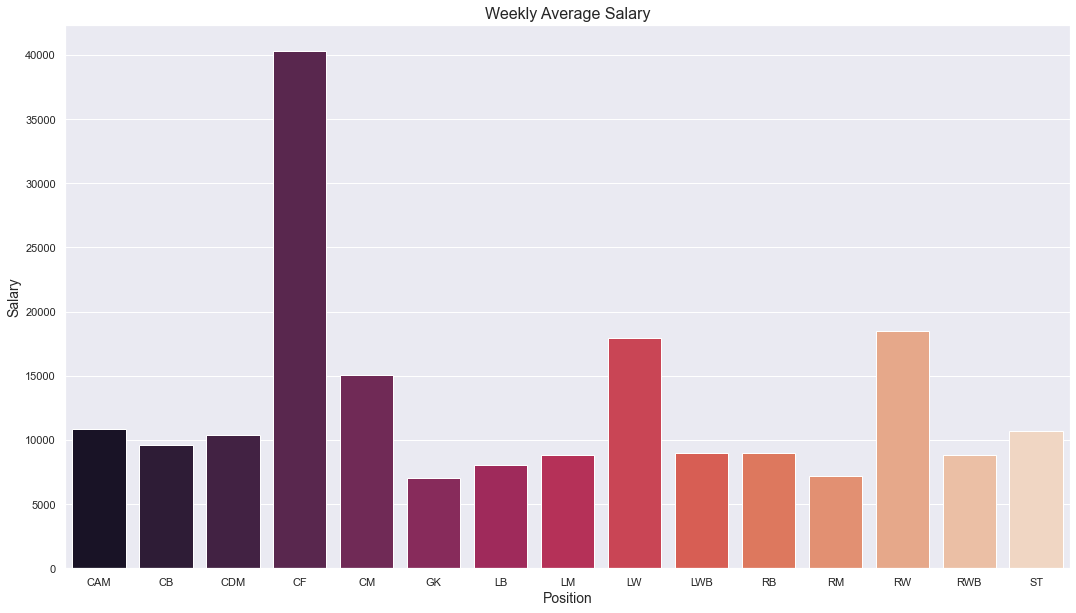

In [24]:
plt.figure(figsize=(18,10))
ax = sns.barplot(x=wage_comp_distribution.index, y=wage_comp_distribution.weekly_salary_mean,
                palette = 'rocket')

plt.title('Weekly Average Salary', size=16)
plt.ylabel('Salary', size = 14)
plt.xlabel('Position', size=14);
#CF have the highest weekly salary on average

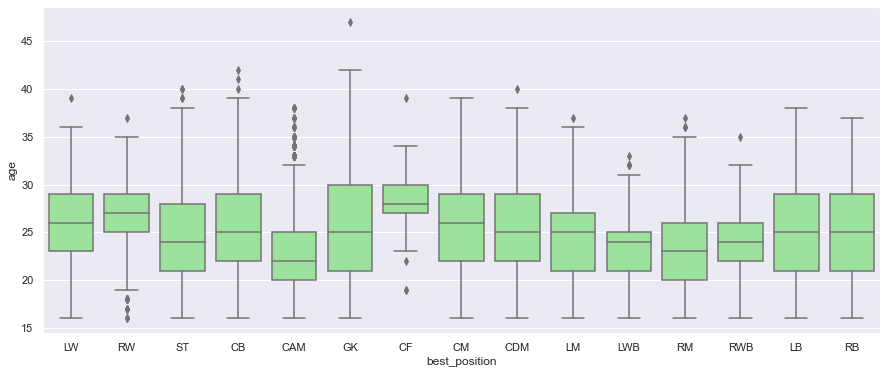

In [25]:
plt.figure(figsize=(15,6))
sns.boxplot(x=wage_comp['best_position'], y = wage_comp['age'], color = 'lightgreen');
#looks like the majority of the oldest players are in the CF position. 
#GK appear to have to highest spread

/Users/drexhepi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


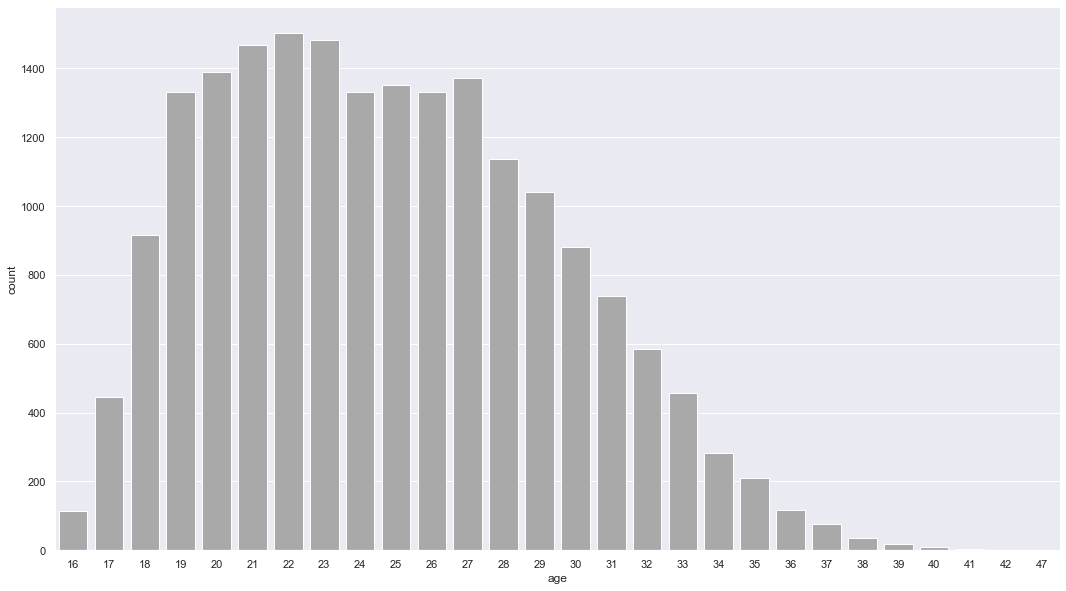

In [26]:
plt.figure(figsize=(18,10))
sns.countplot('age',data=wage_comp, color='darkgray');
#the data is right skewed, which makes sense, a lot of the players are in the mid-20s. That is usualy when you 
#are in your price. And depeding on the position you play on the field, many players can't player longer than the 
#age or 32-35 due to the nature of the sport and high physical demands of the game 

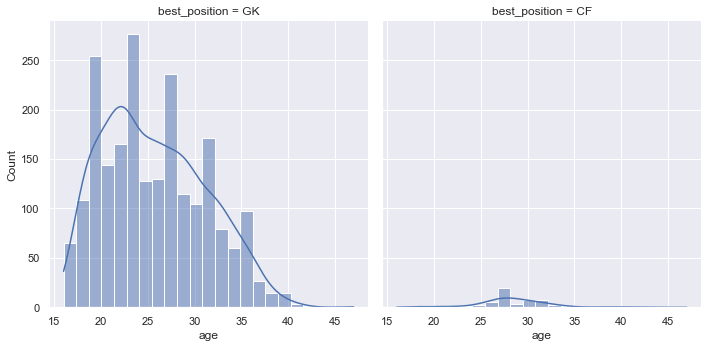

In [27]:
#I know GK and CF tend of have an order average age
sns.displot(data=wage_comp.query('best_position=="CF" | best_position=="GK"'), x='age',col='best_position',
           kde=True);

### Radar Charts

In [28]:
player_sample = data[(data['player_name']=='Neymar Jr') | (data['player_name']=='L. Messi') | 
                    (data['player_name']=='K. Mbappé') | (data['player_name']=='K. De Bruyne') |
                    (data['player_name']=='Cristiano Ronaldo')].set_index('player_name')

In [29]:
player_sample = player_sample[['defense','dribble','pace','passing','physical','shooting']]

In [30]:
player_sample

,defense,dribble,pace,passing,physical,shooting
player_name,,,,,,
Neymar Jr,36,95,91,87,58,85
L. Messi,39,96,87,92,66,92
K. Mbappé,39,90,96,78,76,85
K. De Bruyne,62,87,76,92,78,86
Cristiano Ronaldo,35,89,90,82,78,93


In [201]:
# #columns in a list
# attributes = list(player_sample)

# #len of attributes
# length = len(attributes)

In [200]:
# #sample the first player
# #take a list of the values that we want to plot, copy the first value to the end. when we plot the data,
# # this will be the line that the radar follows 
# values = player_sample.iloc[0].tolist()
# values += values[:1]
# values

In [199]:
# angles = [n/float(length) *2 * pi for n in range(lenght)]
# angles += angles[:1]

In [198]:
# #now we have our values to plot and the angles between them, drawing the radar is pretty simple
# #NOTE 'polar=true' in our subplot - this changes our chart from a more-traditional x and y axes chart, to a more
# #circular radar chart that we are looking for. 

# plt.figure(figsize=(16,8))

# ax = plt.subplot(111, polar=True)

# #add the attributes labels to our axes
# plt.xticks(angles[:-1], attributes, size=15)

# #plot the line around the outside of hte filled area, using the angles and values calculated before
# ax.plot(angles, values)

# #fill in the area plotted in the last line
# ax.fill(angles, values, 'teal', alpha=0.1)

# #give te plot a title and show it
# plt.figtext(0.2, 0.9, 'Neymar', color='teal', size = 20)
# ax.tick_params(axis='both', which = 'major', pad=25)
# plt.show();

In [71]:
# values2 = player_sample.iloc[3].tolist()
# values2 += values2[:1]
# angles2 = [n / float(length) * 2 * pi for n in range(length)]
# angles2 += angles2[:1]

In [84]:
# #create a function that compares two players
# def createRadar(player1, data1, player2, data2):
#     plt.figure(figsize=(16,8))
#     attributes = player_sample.columns.tolist()
    
#     data1 += data1[:1]
#     data2 += data2[:1]
    
#     angles = [(((n/6)*2)*pi) for n in range(6)]
#     angles += angles[:1]
    
#     angles2 = [(((n/6)*2)*pi) for n in range(6)]
#     angles2 += angles2[:1]
    
#     #creat the chart 
#     ax = plt.subplot(111, polar = True)
    
#     plt.xticks(angles[:-1], attributes)
    
#     ax.plot(angles, values)
#     ax.fill(angles, values,alpha=0.1)
    
#     ax.plot(angles2, values2)
#     ax.fill(angles2, values2, alpha=0.05)
    
    
#     #rather than use a title, individual text points are added
#     plt.figtext(0.2,0.9, player1, color='blue')
#     plt.figtext(0.2, 0.85, 'v')
#     plt.figtext(0.2, 0.8, player2, color='darkorange')
    
#     ax.tick_params(axis='both', which='major',pad=25)#pushes the text away from circle

In [197]:
# createRadar(player_sample.index[1], player_sample.iloc[1].tolist(),
#           player_sample.index[4], player_sample.iloc[4].tolist())

In [31]:
from ipywidgets import interact

In [33]:
@interact
def player_radar(player1 = player_sample.index.unique().tolist(),
                 player2 = player_sample.index.unique().tolist()[::-1]):
    
    plt.figure(figsize=(18,12))
    
    features = list(player_sample)
    size = len(features)
    
    player1_values = player_sample.loc[player1].tolist()
    player1_values += player1_values[:1]
    
    player2_values = player_sample.loc[player2].tolist()
    player2_values += player2_values[:1]
    
    angles1 = [(((n/6) *2) *pi) for n in range(6)]
    angles1 += angles1[:1]
    
    angles2 = [(((n/6) *2) *pi) for n in range(6)]
    angles2 += angles2[:1]
    
    #create the chart 
    ax = plt.subplot(111, polar = True)
    
    plt.xticks(angles1[:-1], features, size=20)
    
    #player 1
    ax.plot(angles1, player1_values)
    ax.fill(angles1,player1_values, alpha=0.1)
    
    #player 2 
    ax.plot(angles2, player2_values)
    ax.fill(angles2, player2_values, alpha=0.05)
    
    #push the text away from the circle
    ax.tick_params(axis='both', which = 'major', pad = 25)
    
    #title
    #plt.title('{0} vs. {1}'.format(player1, player2),size=20,pad=25)
    plt.figtext(0.45,0.96, player1, color='blue', size=15, ha = 'right',fontweight='bold')
    plt.figtext(0.48,0.96, 'vs', size = 15, color='k', ha = 'center',fontweight='bold')
    plt.figtext(0.51, 0.96, player2, color='orange', size=15, ha = 'left',fontweight='bold')
    
    plt.show()
    

interactive(children=(Dropdown(description='player1', options=('Neymar Jr', 'L. Messi', 'K. Mbappé', 'K. De Br…

In [34]:
levels = {'attacking_work_rate':{'Low':1, 'Medium':2, 'High':3},
          'defensive_work_rate': {'Low':1, 'Medium':2, 'High':3}}

data = data.replace(levels)

In [35]:
data['weak_foot'] = [int(x[0]) for x in data.weak_foot.str.split(' ')]
data['skill_moves'] = data.skill_moves.str.extract('(\d+)').astype(int)
data = data.drop(columns = ['unique_id','age','height','weight','player_value','weekly_wage'])

In [37]:
data.best_position.unique()

array(['LW', 'RW', 'ST', 'CB', 'CAM', 'GK', 'CF', 'CM', 'CDM', 'LM',
       'LWB', 'RM', 'RWB', 'LB', 'RB'], dtype=object)

In [38]:
data = pd.get_dummies(data, columns = ['preferred_foot'], drop_first = True)

In [40]:
encoder = ce.BinaryEncoder(cols=['best_position'])
data = encoder.fit_transform(data)

In [41]:
data.head()

,player_name,overall_score,best_position_0,best_position_1,best_position_2,best_position_3,best_position_4,crossing,finishing,heading_accuracy,short_passing,volley,dribbling,curves,free_kick_accuracy,long_pass,ball_control,acceleration,sprint_speed,agility,reaction,balance,shot_power,jumping,stamina,strength,long_shot,aggression,interception,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,weak_foot,skill_moves,attacking_work_rate,defensive_work_rate,pace,shooting,passing,dribble,defense,physical,height_cm,weight_kg,preferred_foot_Right
0,Neymar Jr,92,0,0,0,0,1,87,87,62,87,87,96,88,89,81,95,94,89,96,92,84,80,61,81,49,85,51,36,87,90,92,94,35,30,29,5,5,3,2,91,85,87,95,36,58,175.26,68.04,1
1,L. Messi,94,0,0,0,1,0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,4,4,2,1,87,92,92,96,39,66,170.18,72.12,0
2,K. Mbappé,89,0,0,0,1,1,78,89,75,82,81,90,79,63,70,89,96,96,92,91,83,84,76,86,76,79,62,38,90,80,70,84,34,34,32,4,5,3,1,96,85,78,90,39,76,177.80,73.03,1
3,V. van Dijk,91,0,0,1,0,0,53,52,87,79,45,70,60,70,83,77,74,79,61,89,53,81,90,75,92,64,83,90,47,65,62,90,93,93,86,3,2,2,2,77,60,70,71,91,86,193.04,92.08,1
4,K. De Bruyne,91,0,0,1,0,1,94,82,55,92,82,87,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,63,88,94,82,91,68,62,53,5,4,3,3,76,86,92,87,62,78,180.34,69.85,1
